In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import *

print("The current directory is: ")
print(os.getcwd())
if not os.getcwd().endswith("Abaqus-Hardening-Seq-2-Seq-Project"):
    # Move up two directories
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
print("The current directory is: ")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project
The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project


In [39]:
from configs.chosen_project import *
from src.stage1_global_configs import *

chosen_project_path = "configs/global_config_CP1000_RD_20C.json"

global_configs = main_global_configs(chosen_project_path)

all_paths = global_configs['all_paths']
objectives = global_configs['objectives']


= Stage 1: Loading configs and all paths =

Welcome to Abaqus Seq2Seq flow curve calibration project

The configurations you have chosen: 

+--------------------------+------------------------------------------------------------------+
|      Global Configs      |                           User choice                            |
+--------------------------+------------------------------------------------------------------+
|         PROJECT          |                          CP1000_RD_20C                           |
|        OBJECTIVES        |        CHD2, CHD4, NDBR2p5, NDBR6, NDBR15, NDBR40, SH115         |
|       PROJECT_PATH       | c:\Users\springnuance\Desktop\Abaqus-Hardening-Seq-2-Seq-Project |
|    TRAINING_DATA_PATH    |                   training_data/CP1000_RD_20C                    |
|         LOG_PATH         |                        log/CP1000_RD_20C                         |
|       MODELS_PATH        |                       models/CP1000_RD_20C                    

### Plotting training and testing loss of LSTM model (No Transformer here!)

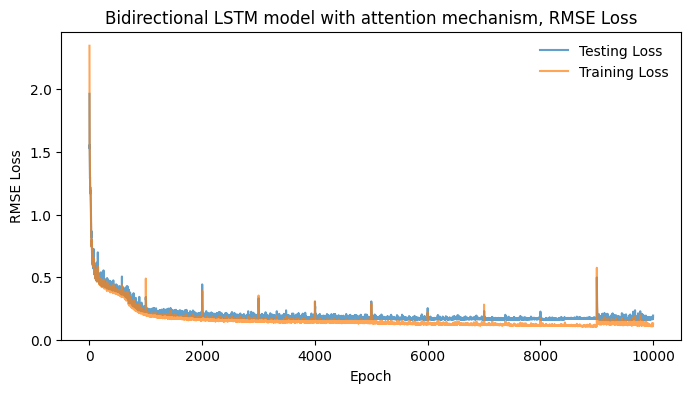

In [40]:
models_path = all_paths['models_path']
train_losses = []
test_losses = []
for i in range(1, 11):
    train_losses.extend(np.load(f"{models_path}/LSTM/initial/train_losses_{i}_train_diff.npy", allow_pickle=True).tolist())
    test_losses.extend(np.load(f"{models_path}/LSTM/initial/test_losses_{i}_train_diff.npy", allow_pickle=True).tolist())

plt.figure(figsize=(8, 4))

plt.plot(test_losses, label='Testing Loss', alpha= 0.7)
plt.plot(train_losses, label='Training Loss', alpha= 0.7)
plt.title('Bidirectional LSTM model with attention mechanism, RMSE Loss')
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend(frameon=False)   

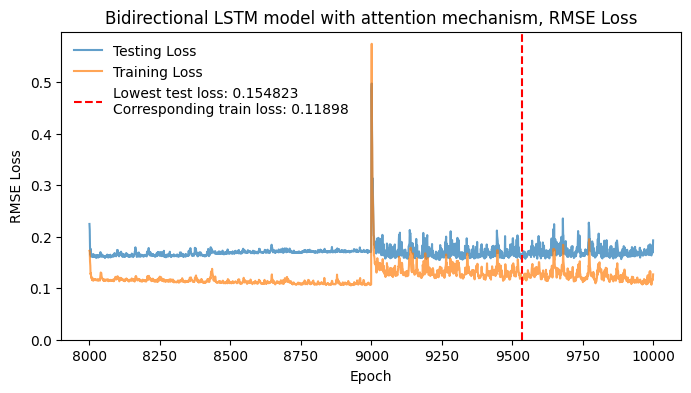

In [41]:
models_path = all_paths['models_path']
train_losses = []
test_losses = []
for i in range(9, 11):
    train_losses.extend(np.load(f"{models_path}/LSTM/initial/train_losses_{i}_train_diff.npy", allow_pickle=True).tolist())
    test_losses.extend(np.load(f"{models_path}/LSTM/initial/test_losses_{i}_train_diff.npy", allow_pickle=True).tolist())

plt.figure(figsize=(8, 4))

lowest_test_loss = min(test_losses)
epoch_lowest_test_loss = test_losses.index(lowest_test_loss)
corresponding_train_loss = train_losses[epoch_lowest_test_loss]

lowest_test_loss = round(lowest_test_loss, 6)
corresponding_train_loss = round(corresponding_train_loss, 6)

epochs = np.arange(8000, 10000)
plt.plot(epochs, test_losses, label=f'Testing Loss', alpha= 0.7)
plt.plot(epochs, train_losses, label=f'Training Loss', alpha= 0.7)
plt.axvline(x=epoch_lowest_test_loss+8000, color='r', linestyle='--', label=f'Lowest test loss: {lowest_test_loss}\nCorresponding train loss: {corresponding_train_loss}')
plt.title('Bidirectional LSTM model with attention mechanism, RMSE Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.ylim(bottom=0)
plt.legend(frameon=False)   

# Loading the experiment data

In [42]:
import torch

training_data_path = all_paths['training_data_path']
models_path = all_paths['models_path']

exp_source_original_all_unscaled = torch.load(f"{training_data_path}/exp_source_original_all_unscaled.pt")
exp_source_diff_all_unscaled = torch.load(f"{training_data_path}/exp_source_diff_all_unscaled.pt")

initial_train_source_diff_all = torch.load(f"{training_data_path}/initial_train_source_diff_all.pt")
initial_train_target_diff_last = torch.load(f"{training_data_path}/initial_train_target_diff_last.pt")

initial_test_source_diff_all = torch.load(f"{training_data_path}/initial_test_source_diff_all.pt")
initial_test_target_diff_last = torch.load(f"{training_data_path}/initial_test_target_diff_last.pt")

# Convert them to float32

exp_source_original_all_unscaled = exp_source_original_all_unscaled.float()
exp_source_diff_all_unscaled = exp_source_diff_all_unscaled.float()

initial_train_source_diff_all = initial_train_source_diff_all.float()
initial_train_target_diff_last = initial_train_target_diff_last.float()

initial_test_source_diff_all = initial_test_source_diff_all.float()
initial_test_target_diff_last = initial_test_target_diff_last.float()

print(f"Shape of exp_source_original_all_unscaled: {exp_source_original_all_unscaled.shape}")
print(f"Shape of exp_source_diff_all_unscaled: {exp_source_diff_all_unscaled.shape}")

# Check if it has NaN or infinite values

print(f"Number of NaN values in exp_source_original_all_unscaled: {np.isnan(exp_source_original_all_unscaled).sum()}")
print(f"Number of NaN values in exp_source_diff_all_unscaled: {np.isnan(exp_source_diff_all_unscaled).sum()}")

print(f"Number of infinite values in exp_source_original_all_unscaled: {np.isinf(exp_source_original_all_unscaled).sum()}")
print(f"Number of infinite values in exp_source_diff_all_unscaled: {np.isinf(exp_source_diff_all_unscaled).sum()}")

Shape of exp_source_original_all_unscaled: torch.Size([1, 100, 7])
Shape of exp_source_diff_all_unscaled: torch.Size([1, 99, 7])
Number of NaN values in exp_source_original_all_unscaled: 0
Number of NaN values in exp_source_diff_all_unscaled: 0
Number of infinite values in exp_source_original_all_unscaled: 0
Number of infinite values in exp_source_diff_all_unscaled: 0


In [43]:
# Define the device

training_env = "local" # Choose between "local" and "CSC"
if training_env == "local":
    device = "cpu"
else:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [44]:
from optimization.LSTM import *

# Start loading the trained models

In [45]:
from optimization.LSTM import *

# Parameters
_, LSTM_source_len, LSTM_feature_size = initial_train_source_diff_all.shape
_, LSTM_target_len, LSTM_label_size = initial_train_target_diff_last.shape

hidden_size = 256
num_layers = 3
dropout = 0.001

bidirectional = True  
use_attention = True 

# Initialize model, loss function, and optimizer
LSTM_model = LSTMModel(LSTM_feature_size, LSTM_label_size,
                  LSTM_source_len, LSTM_target_len,
                  hidden_size, num_layers,
                  dropout=dropout,
                  bidirectional=bidirectional, 
                  use_attention=use_attention).to(device)

LSTM_model.to(device)
LSTM_model.load_state_dict(torch.load(f"models/CP1000_RD_20C/LSTM/initial/best_model_10_train_diff.pth"))

<All keys matched successfully>

In [46]:
model_config = global_configs['model_config']
scale_source = model_config['scale_source']
scale_target = model_config['scale_target']
divided_index = model_config['divided_index']

### Reconstruct the predicted flow curve

In [47]:
from modules.predict import *

scale_source = global_configs['model_config']['scale_source']
scale_target = global_configs['model_config']['scale_target']
targets_path = all_paths['targets_path']
divided_index = global_configs['model_config']['divided_index']

print(f"divided_index: {divided_index}")

referenced_flow_curve_pd = pd.read_csv(f"{targets_path}/referenced_flow_curve.csv")
referenced_flow_curve_stress = referenced_flow_curve_pd['stress/Pa'].to_numpy()[:divided_index+1]

# Now we turn it into a float tensor
referenced_flow_curve_stress = torch.tensor(referenced_flow_curve_stress, dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)

print(f"Shape of referenced_flow_curve_stress: {referenced_flow_curve_stress.shape}")

exp_target_original_all = seq2seq_predict_with_referenced_flow_curve(referenced_exp_target_original_first=referenced_flow_curve_stress,
                                              LSTM_model=LSTM_model,
                                              exp_source_diff_all=exp_source_diff_all_unscaled,
                                              scale_source=scale_source, 
                                              scale_target=scale_target,
                                            )

# Squeeze first and last dim and convert to np
exp_target_original_all = exp_target_original_all.squeeze(0).squeeze(-1).detach().cpu().numpy()

print(f"Shape of exp_target_original_all: {exp_target_original_all.shape}")

divided_index: 19
Shape of referenced_flow_curve_stress: torch.Size([1, 20, 1])
Shape of exp_target_original_all: (100,)


### Plot the predicted flow curve

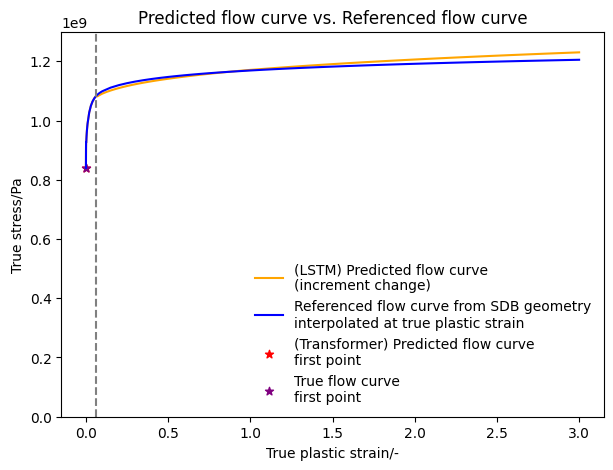

In [48]:
figure = plt.figure(figsize=(7, 5))

targets_path = all_paths['targets_path']

true_plastic_strain = np.load(f"{targets_path}/true_plastic_strain.npy", allow_pickle=True)
plt.plot(true_plastic_strain, exp_target_original_all, label="(LSTM) Predicted flow curve\n(increment change)", color='orange')

# We should also load the referenced flow curve from the SDB geometry
referenced_flow_curve_pd = pd.read_csv(f"{targets_path}/referenced_flow_curve.csv")
referenced_flow_curve = referenced_flow_curve_pd["stress/Pa"].values

plt.plot(true_plastic_strain, referenced_flow_curve, 
         label="Referenced flow curve from SDB geometry\ninterpolated at true plastic strain", color='blue')

# referenced_flow_curve_original_pd = pd.read_csv(f"{targets_path}/referenced_flow_curve_original.csv")
# referenced_flow_curve_original = referenced_flow_curve_original_pd["stress/Pa"].values
# original_plastic_strain = referenced_flow_curve_original_pd["strain/-"].values

# plt.plot(original_plastic_strain, referenced_flow_curve_original,
#          label="Referenced flow curve from SDB geometry original", color='purple', linestyle='--')

# scatter the first point with a star marker 
plt.scatter(true_plastic_strain[0], exp_target_original_all[0], label=f"(Transformer) Predicted flow curve\nfirst point", marker='*', color='red')
plt.scatter(true_plastic_strain[0], referenced_flow_curve[0], label="True flow curve\nfirst point", marker='*', color='purple')
        
# draw veritcal line at 0.05
plt.axvline(x=0.06, color='gray', linestyle='--')
plt.title("Predicted flow curve vs. Referenced flow curve")
plt.ylim(bottom=0, top=1.3e9)
plt.xlabel("True plastic strain/-")
plt.ylabel("True stress/Pa")
plt.legend(frameon=False)

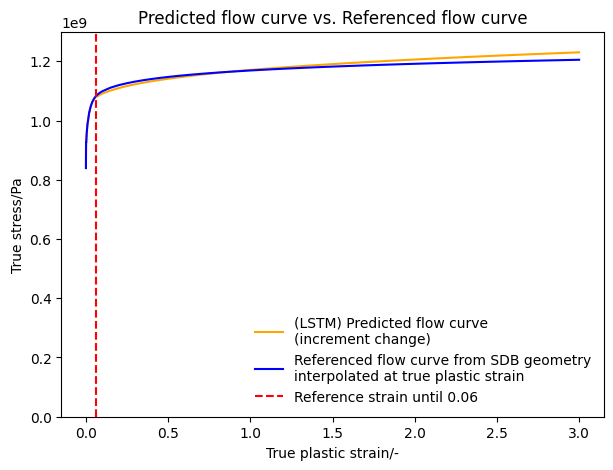

In [49]:
targets_path = all_paths['targets_path']
divided_index = global_configs['model_config']['divided_index']

true_plastic_strain = np.load(f"{targets_path}/true_plastic_strain.npy", allow_pickle=True)

figure = plt.figure(figsize=(7, 5))
plt.plot(true_plastic_strain, exp_target_original_all, label="(LSTM) Predicted flow curve\n(increment change)", color='orange')

# We should also load the referenced flow curve from the SDB geometry
referenced_flow_curve_pd = pd.read_csv(f"{targets_path}/referenced_flow_curve.csv")
referenced_flow_curve = referenced_flow_curve_pd["stress/Pa"].values

plt.plot(true_plastic_strain, referenced_flow_curve, 
         label="Referenced flow curve from SDB geometry\ninterpolated at true plastic strain", color='blue')

# draw veritcal line at divided_index
plt.axvline(x=true_plastic_strain[divided_index], color='r', linestyle='--', label=f'Reference strain until {true_plastic_strain[divided_index]}')

plt.title("Predicted flow curve vs. Referenced flow curve")
plt.ylim(bottom=0, top=1.3e9)
plt.xlabel("True plastic strain/-")
plt.ylabel("True stress/Pa")
plt.legend(frameon=False)

In [50]:
### Now we would need to write the flow curve to the template files

import os
import shutil
from utils.IO import replace_flow_curve

templates_path = all_paths['templates_path']

for objective in objectives:
    if os.path.exists(f"temp/CP1000_RD_20C_divided_index_19/{objective}"):
        shutil.rmtree(f"temp/CP1000_RD_20C_divided_index_19/{objective}")
    shutil.copytree(f"{templates_path}/{objective}", f"temp/CP1000_RD_20C_divided_index_19/{objective}")    
    true_stress = exp_target_original_all
    replace_flow_curve(f"temp/CP1000_RD_20C_divided_index_19/{objective}/geometry.inp", true_plastic_strain, true_stress)

### Checking how the models perform on training data

torch.Size([9, 99, 7])
torch.Size([9, 100, 1])


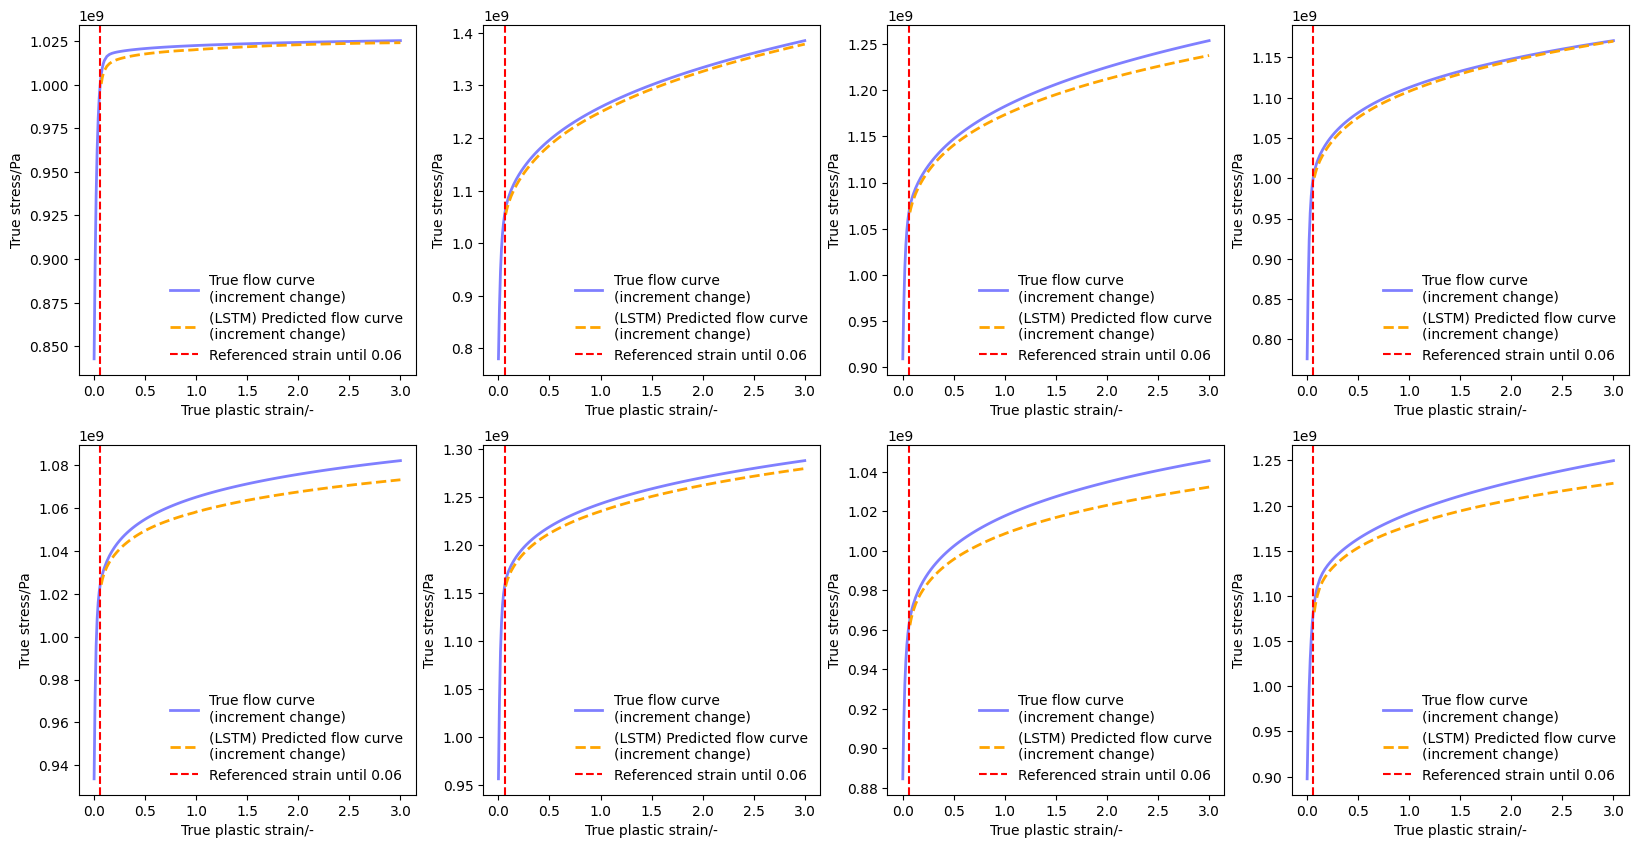

In [52]:
training_data_path = all_paths['training_data_path']
divided_index = global_configs['model_config']['divided_index']

initial_train_source_diff_all = torch.load(f"{training_data_path}/initial_train_source_diff_all.pt")

# This is the referenced flow curve
initial_train_target_original_all = torch.load(f"{training_data_path}/initial_train_target_original_all.pt")

# Convert them to float32
initial_train_source_diff_all = initial_train_source_diff_all.float()
initial_train_target_original_all = initial_train_target_original_all.float()

# Choose randomly 9 samples from training data
random_indices = np.random.choice(initial_train_source_diff_all.shape[0], 9, replace=False)

random_initial_train_source_diff_all = initial_train_source_diff_all[random_indices]
random_initial_train_target_original_all = initial_train_target_original_all[random_indices]

# inverse scaling to the original scale
random_initial_train_source_diff_all = random_initial_train_source_diff_all / scale_source
random_initial_train_target_original_all = random_initial_train_target_original_all / scale_target

# Now we obtain the first stress values
print(random_initial_train_source_diff_all.shape)
print(random_initial_train_target_original_all.shape)

random_initial_train_target_original_first = random_initial_train_target_original_all[:, :(divided_index+1), :]

random_initial_train_target_original_all_predicted\
  = seq2seq_predict_with_referenced_flow_curve(referenced_exp_target_original_first=random_initial_train_target_original_first,
                                                LSTM_model=LSTM_model,
                                                exp_source_diff_all=random_initial_train_source_diff_all,
                                                scale_source=scale_source,
                                                scale_target=scale_target,
                                                )
# assert that random_initial_train_target_original_predicted is monotnicially increasing

assert np.all(np.diff(random_initial_train_target_original_all_predicted, axis=1) >= 0)

# Now we plot the predicted flow curves for the randomly selected samples on 3 x 3 grid

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# flatten
ax = ax.flatten()

for i in range(8):

    ax[i].plot(true_plastic_strain, random_initial_train_target_original_all[i], color="blue", label="True flow curve\n(increment change)", alpha=0.5, linewidth=2)
    ax[i].plot(true_plastic_strain[divided_index+1:], random_initial_train_target_original_all_predicted[i][divided_index+1:], color="orange",label="(LSTM) Predicted flow curve\n(increment change)", linestyle="--", linewidth=2)
    # Plot vertical line at divided_index
    ax[i].axvline(x=true_plastic_strain[divided_index], color='r', linestyle='--', label=f'Referenced strain until {true_plastic_strain[divided_index]}')

    #ax[i].set_ylim(bottom=0, top=1.3e9)
    ax[i].set_xlabel("True plastic strain/-")
    ax[i].set_ylabel("True stress/Pa")
    ax[i].legend(frameon=False)

### Checking how the models perform on testing data

torch.Size([9, 99, 7])
torch.Size([9, 100, 1])


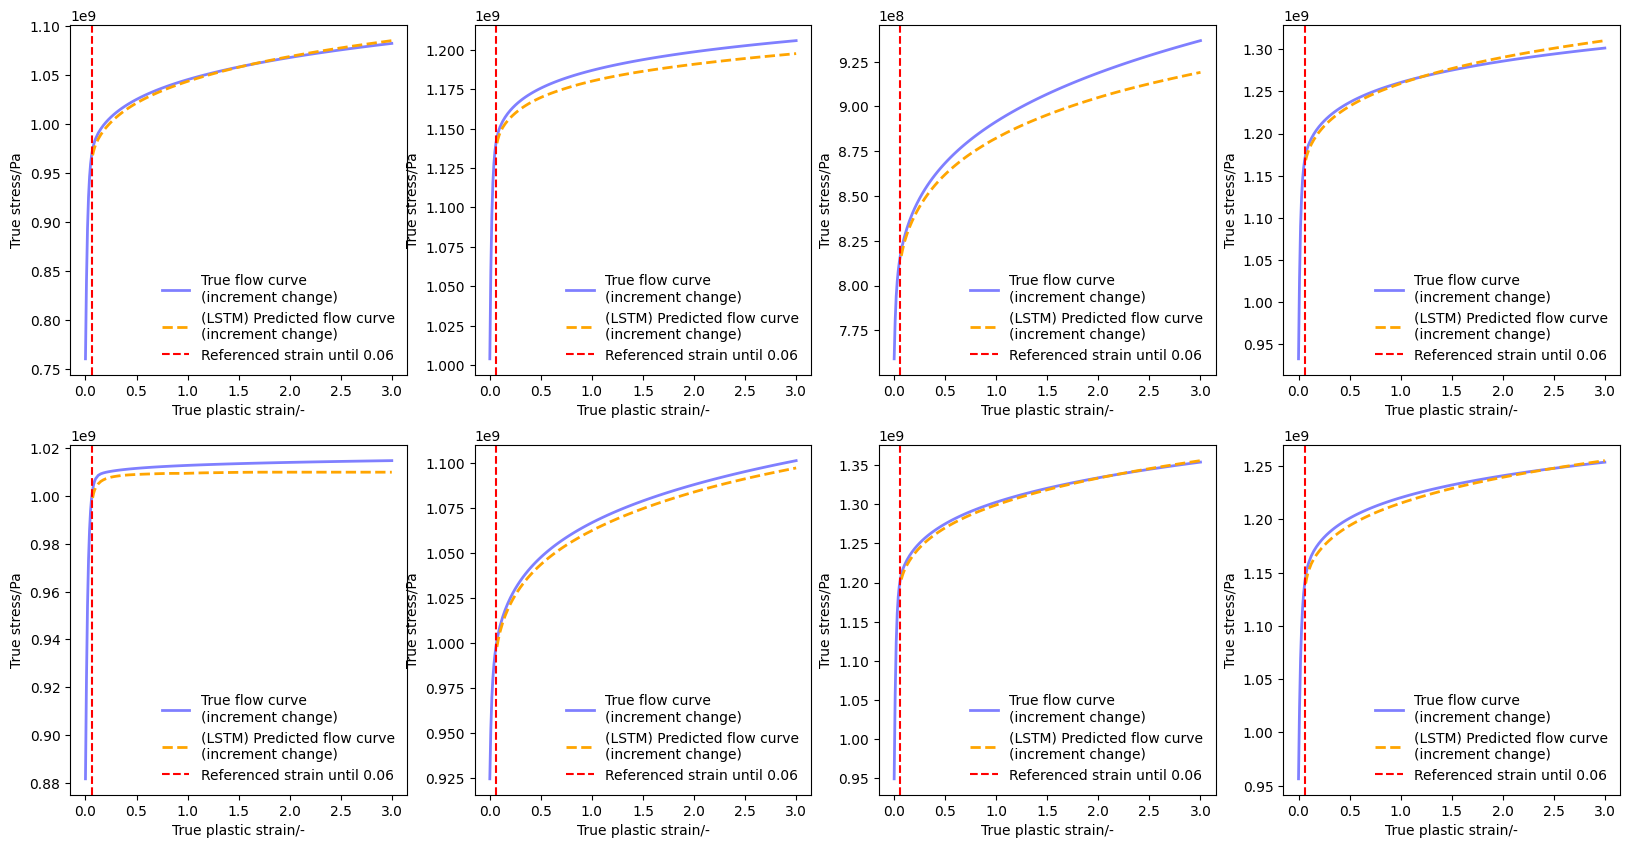

In [53]:
training_data_path = all_paths['training_data_path']
divided_index = global_configs['model_config']['divided_index']

initial_test_source_diff_all = torch.load(f"{training_data_path}/initial_test_source_diff_all.pt")

# This is the referenced flow curve
initial_test_target_original_all = torch.load(f"{training_data_path}/initial_test_target_original_all.pt")

# Convert them to float32
initial_test_source_diff_all = initial_test_source_diff_all.float()
initial_test_target_original_all = initial_test_target_original_all.float()

# Choose randomly 9 samples from training data
random_indices = np.random.choice(initial_test_source_diff_all.shape[0], 9, replace=False)

random_initial_test_source_diff_all = initial_test_source_diff_all[random_indices]
random_initial_test_target_original_all = initial_test_target_original_all[random_indices]

# inverse scaling to the original scale
random_initial_test_source_diff_all = random_initial_test_source_diff_all / scale_source
random_initial_test_target_original_all = random_initial_test_target_original_all / scale_target

# Now we obtain the first stress values
print(random_initial_test_source_diff_all.shape)
print(random_initial_test_target_original_all.shape)

random_initial_test_target_original_first = random_initial_test_target_original_all[:, :(divided_index+1), :]

random_initial_test_target_original_all_predicted\
    = seq2seq_predict_with_referenced_flow_curve(referenced_exp_target_original_first=random_initial_test_target_original_first,
                                                    LSTM_model=LSTM_model,
                                                    exp_source_diff_all=random_initial_test_source_diff_all,
                                                    scale_source=scale_source,
                                                    scale_target=scale_target,
                                                    )

# assert that random_initial_train_target_original_predicted is monotnicially increasing

assert np.all(np.diff(random_initial_test_target_original_all_predicted, axis=1) >= 0)

# Now we plot the predicted flow curves for the randomly selected samples on 3 x 3 grid

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# flatten
ax = ax.flatten()
for i in range(8):
    
        ax[i].plot(true_plastic_strain, random_initial_test_target_original_all[i], color="blue", label="True flow curve\n(increment change)", alpha=0.5, linewidth=2)
        ax[i].plot(true_plastic_strain[divided_index+1:], random_initial_test_target_original_all_predicted[i][divided_index+1:], color="orange",label="(LSTM) Predicted flow curve\n(increment change)", linestyle="--", linewidth=2)
        # Plot vertical line at divided_index
        ax[i].axvline(x=true_plastic_strain[divided_index], color='r', linestyle='--', label=f'Referenced strain until {true_plastic_strain[divided_index]}')
    
        #ax[i].set_ylim(bottom=0, top=1.3e9)
        ax[i].set_xlabel("True plastic strain/-")
        ax[i].set_ylabel("True stress/Pa")
        ax[i].legend(frameon=False)
